In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Admission.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=['Serial No.'],inplace=True)

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [11]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [12]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [13]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
xtrain

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.transform(xtest)

In [17]:
xtrain_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [18]:
xtest_scaled

array([[ 0.46      ,  0.5       ,  0.25      ,  0.375     ,  0.14285714,
         0.5224359 ,  0.        ],
       [ 0.44      ,  0.53571429,  0.5       ,  0.5       ,  0.42857143,
         0.53205128,  1.        ],
       [ 0.98      ,  0.96428571,  1.        ,  0.875     ,  0.71428571,
         0.92948718,  0.        ],
       [ 0.52      ,  0.53571429,  0.25      ,  0.625     ,  0.57142857,
         0.58974359,  1.        ],
       [ 0.7       ,  0.64285714,  0.75      ,  0.875     ,  0.71428571,
         0.69230769,  1.        ],
       [ 0.42      ,  0.32142857,  0.25      ,  0.375     ,  0.57142857,
         0.49358974,  1.        ],
       [ 0.6       ,  0.42857143,  0.5       ,  0.5       ,  0.57142857,
         0.62179487,  1.        ],
       [ 0.74      ,  0.39285714,  0.5       ,  0.75      ,  0.71428571,
         0.48076923,  1.        ],
       [ 0.62      ,  0.67857143,  0.5       ,  0.625     ,  0.71428571,
         0.65064103,  1.        ],
       [ 0.56      ,  0.5   

In [19]:
!pip install tensorflow


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras. layers import Dense

In [21]:
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [24]:
history=model.fit(xtrain_scaled,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100

10/10 [==============================] - 2s 41ms/step - loss: 0.5791 - val_loss: 0.5833
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5161 - val_loss: 0.5180
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4615 - val_loss: 0.4621
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4162 - val_loss: 0.4085
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3693 - val_loss: 0.3525
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 0.3058 - val_loss: 0.2660
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.2104 - val_loss: 0.1544
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1138 - val_loss: 0.0741
Epoch 9/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0545 - val_loss: 0.0416
Epoch 10/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0346 - val_loss: 0.0369
Epoc

In [25]:
ypred=model.predict(xtest_scaled)

4/4 [==============================] - 0s 3ms/step


In [26]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.7904219438694697

In [27]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


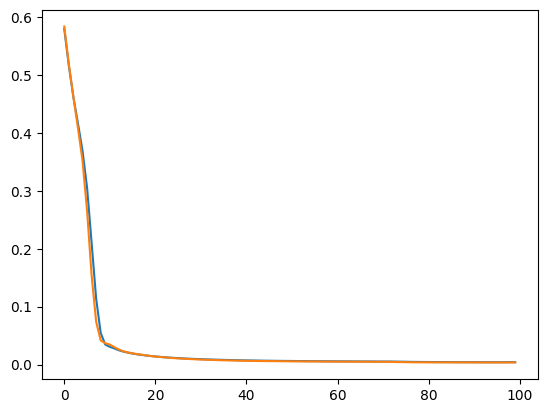

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
